# **1. Install Dependencies**

In [1]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for ignore the Warnings
import warnings
warnings.filterwarnings("ignore")

# **2. Import the Datasets**

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **3. Undestanding The Data**

In [3]:
# showing 10 random samples
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
17,22,No,Non-Travel,1123,Research & Development,16,2,Medical,1,22,...,2,80,2,1,2,2,1,0,0,0
707,47,No,Travel_Frequently,1379,Research & Development,16,4,Medical,1,987,...,3,80,0,20,3,4,19,10,2,7
1392,35,No,Travel_Rarely,1224,Sales,7,4,Life Sciences,1,1962,...,4,80,0,10,2,3,10,8,0,9
918,51,No,Travel_Frequently,237,Sales,9,3,Life Sciences,1,1282,...,1,80,1,31,5,2,29,10,11,10
1414,47,No,Travel_Rarely,1180,Research & Development,25,3,Medical,1,1993,...,2,80,0,25,3,3,17,14,12,11
527,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
597,42,No,Travel_Rarely,932,Research & Development,1,2,Life Sciences,1,827,...,4,80,1,8,4,3,4,3,0,2
121,33,No,Non-Travel,750,Sales,22,2,Marketing,1,160,...,1,80,1,8,2,4,7,7,0,7
158,40,No,Travel_Rarely,630,Sales,4,4,Marketing,1,215,...,1,80,1,15,2,2,12,11,2,11
255,25,No,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,...,4,80,2,5,3,3,4,2,1,2


* Target column is Attrition in this dataset

In [4]:
# shape of the data
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
df.drop(columns=['EmployeeCount',
       'EmployeeNumber', 'MonthlyRate', 'HourlyRate',
       'Over18', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'WorkLifeBalance'], inplace=True)

In [14]:
# columns present in the data
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
# numerical data presnt in the dataset
num_data = df.select_dtypes(include=["int64","float64"])
print("numerical columns: ",num_data.columns)

numerical columns:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [16]:
# categorical data present in the dataset
cat_data = df.select_dtypes(include=['object'])
print("categorical columns: ",cat_data.columns)

categorical columns:  Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [17]:
for i in cat_data:
    print(i,df[i].unique())
    print(df[i].value_counts())
    print("----------------------------")

Attrition ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------
Department ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------
Gender ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
----------------------------
JobRole ['Sales Executive' 'Research Scientist' 'Labor

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


## insights:


1. **Age Distribution**: The average age of employees in the dataset is approximately 36.9 years, with a standard deviation of 9.14. The ages range from 18 to 60 years, with the majority falling between 30 and 43 years old.

2. **Daily Rate**: The average daily rate is around $802.49, with a standard deviation of $403.51. Daily rates vary widely, ranging from $102 to $1499.

3. **Distance From Home**: On average, employees live approximately 9.19 units of distance from their workplace, with a standard deviation of 8.11. The distance ranges from 1 to 29 units.

4. **Education Level**: The average education level is 2.91, indicating that most employees have completed some college or technical training. Education levels range from 1 (high school) to 5 (doctorate).

5. **Monthly Income**: The average monthly income is $6502.93, with a significant standard deviation of $4707.96. Monthly incomes vary widely, ranging from $1009 to $19999.

6. **Job Satisfaction and Engagement**: Employees generally report moderate levels of job satisfaction and engagement. The average scores for job satisfaction, environment satisfaction, job involvement, and relationship satisfaction are around 2.72 to 2.73, on a scale of 1 to 4.

7. **Job Level and Experience**: The average job level is 2.06, indicating that most employees hold mid-level positions. Total working years average around 11.28, with a wide standard deviation of 7.78, suggesting a diverse range of experience levels within the dataset.

8. **Promotions and Managerial Relationships**: On average, employees have been with their current manager for approximately 4.12 years. However, years since the last promotion average only 2.19, indicating potential opportunities for career advancement.



In [19]:
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [20]:
# is there any null values present in the dataset
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [21]:
# is there any duplicated values present in the dataset
df.duplicated().sum()

0

# **4. Exploratory Data Analysis**

# 4.1 Univariate Analysis

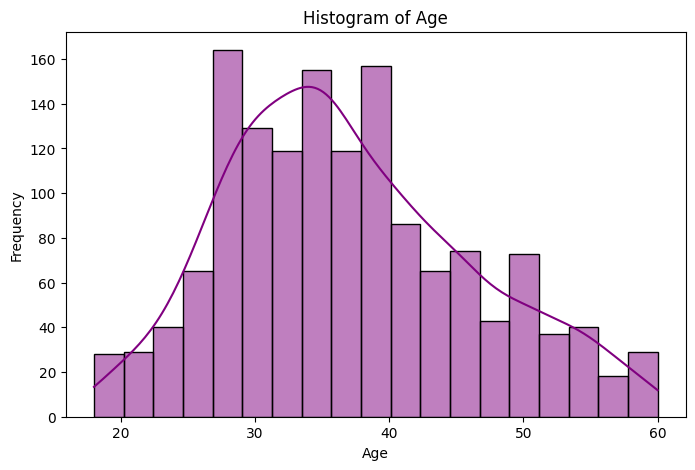

<Figure size 640x480 with 0 Axes>

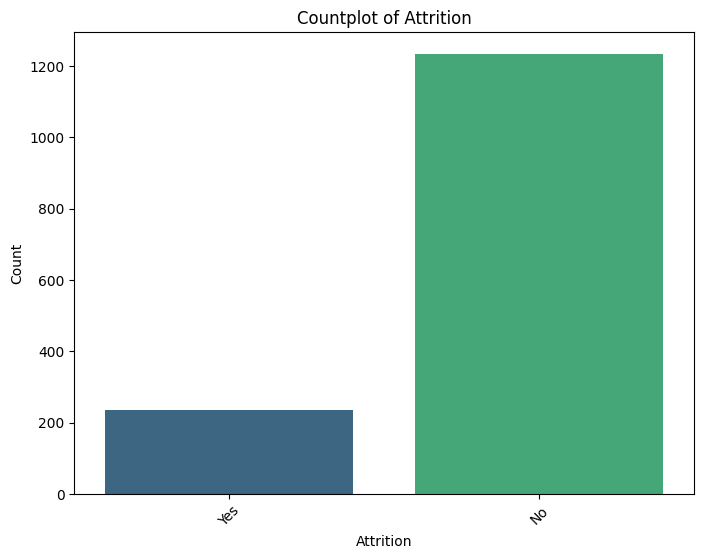

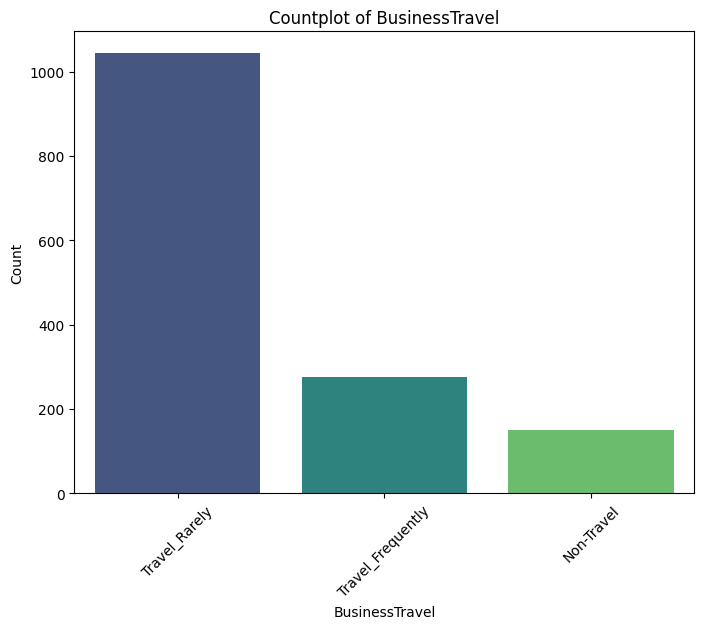

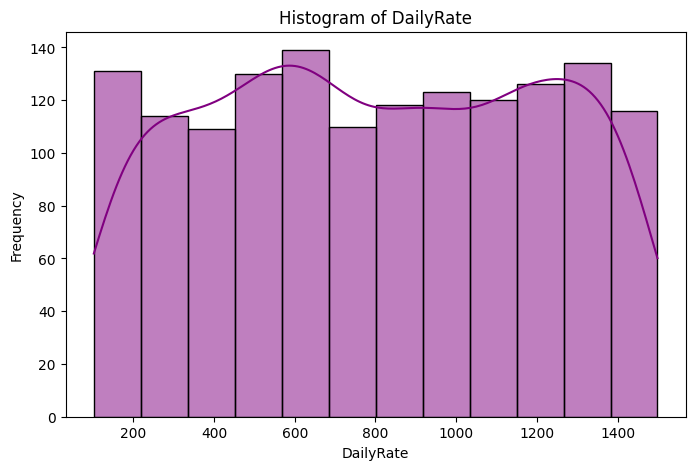

<Figure size 640x480 with 0 Axes>

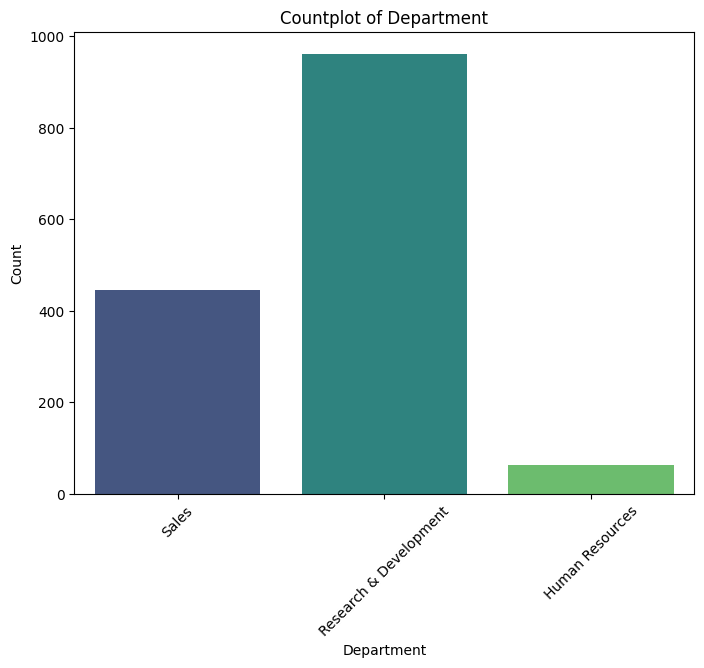

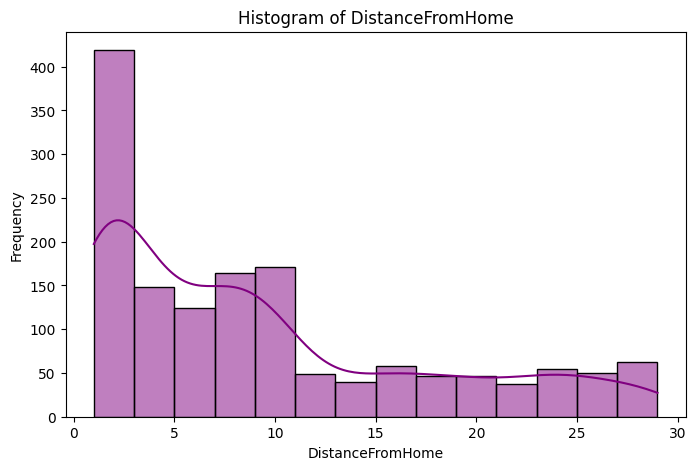

<Figure size 640x480 with 0 Axes>

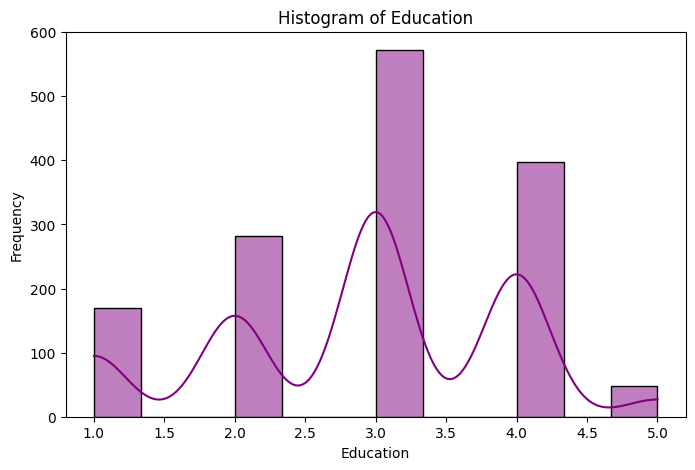

<Figure size 640x480 with 0 Axes>

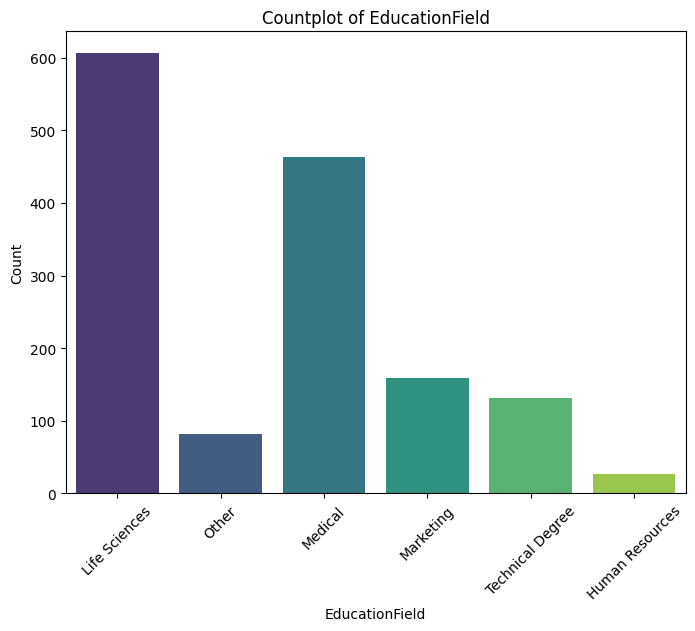

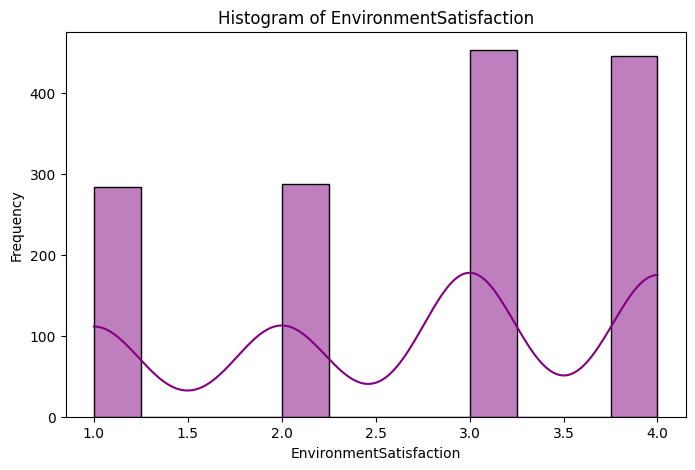

<Figure size 640x480 with 0 Axes>

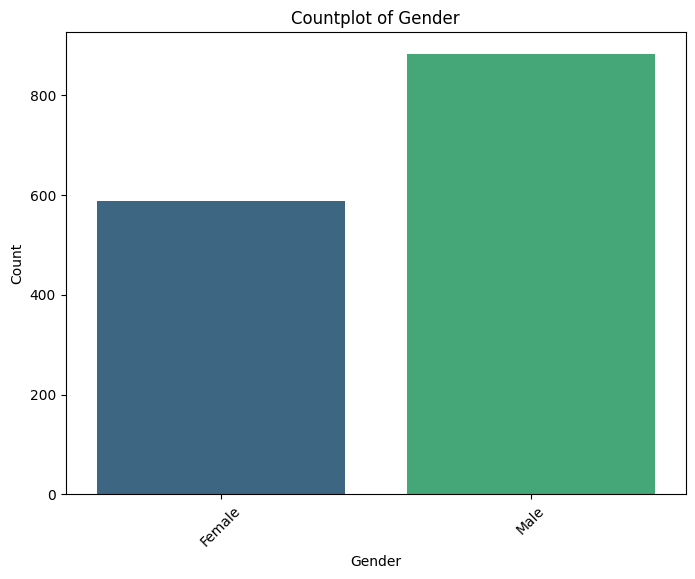

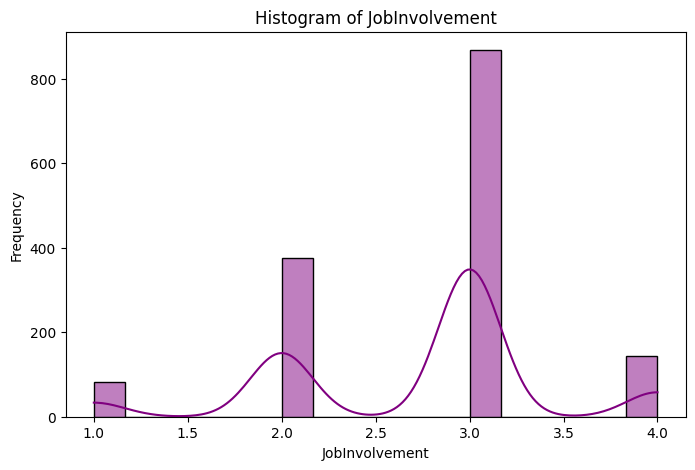

<Figure size 640x480 with 0 Axes>

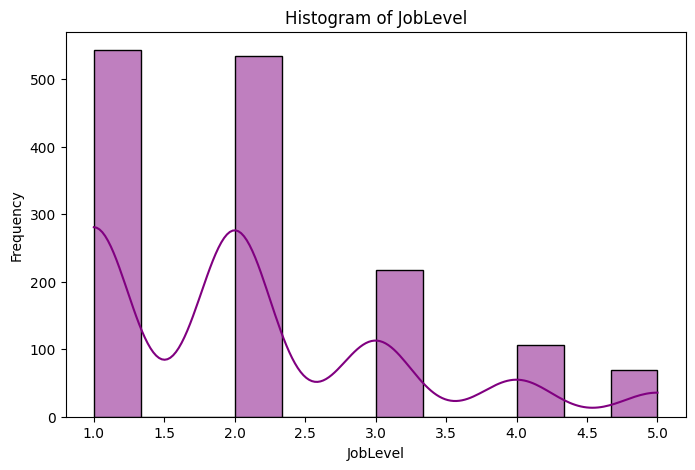

<Figure size 640x480 with 0 Axes>

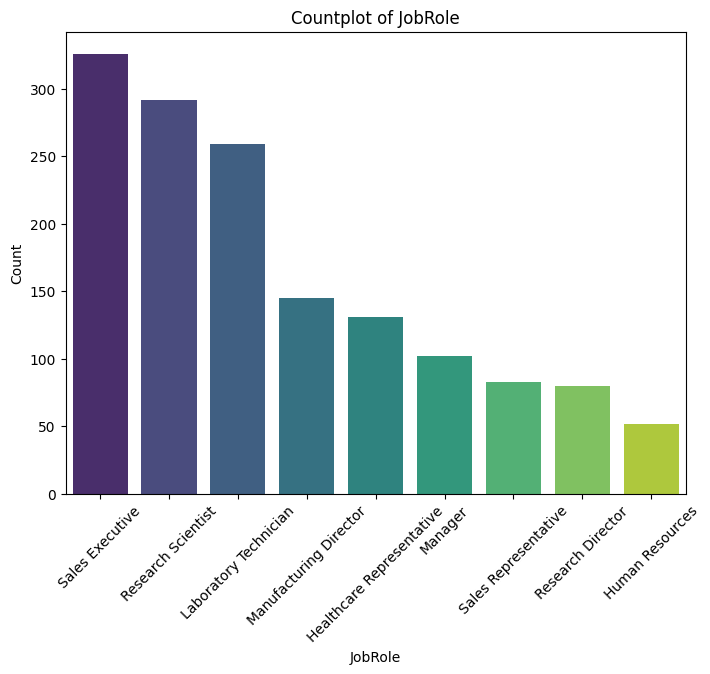

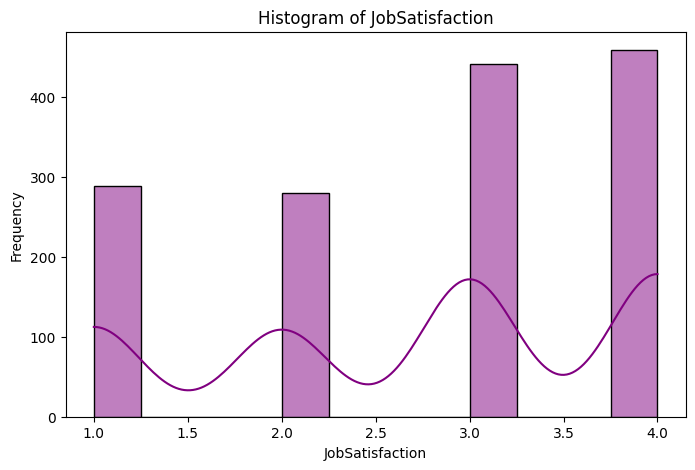

<Figure size 640x480 with 0 Axes>

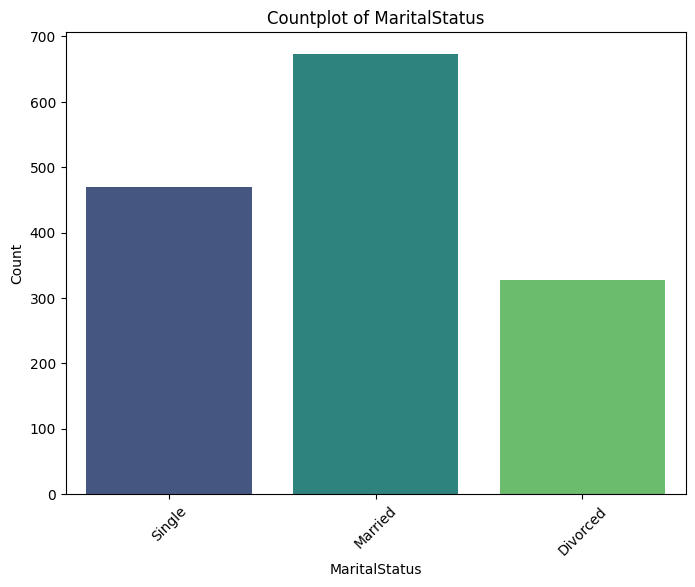

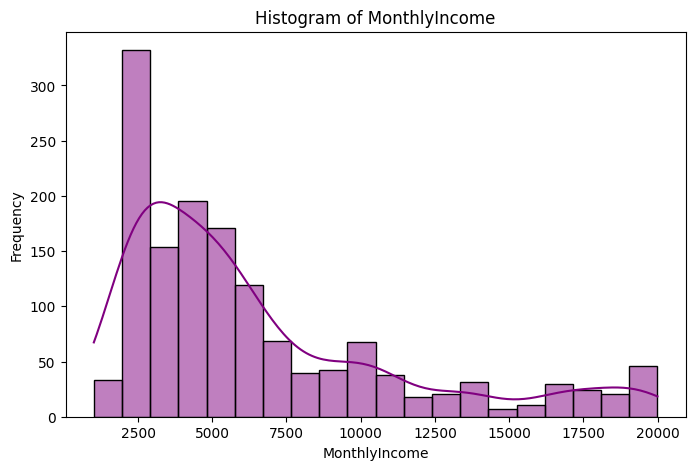

<Figure size 640x480 with 0 Axes>

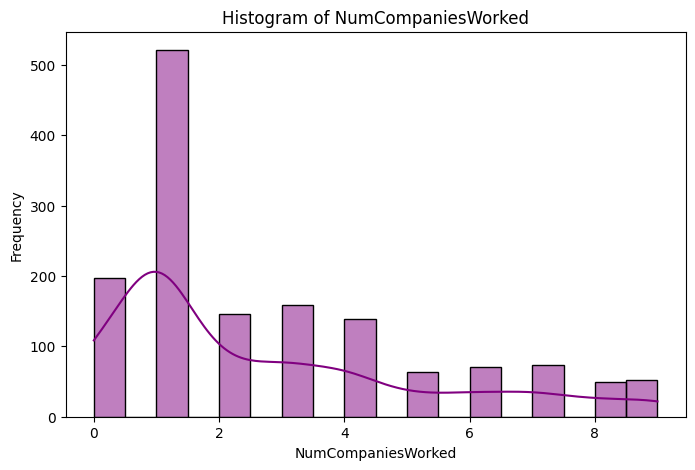

<Figure size 640x480 with 0 Axes>

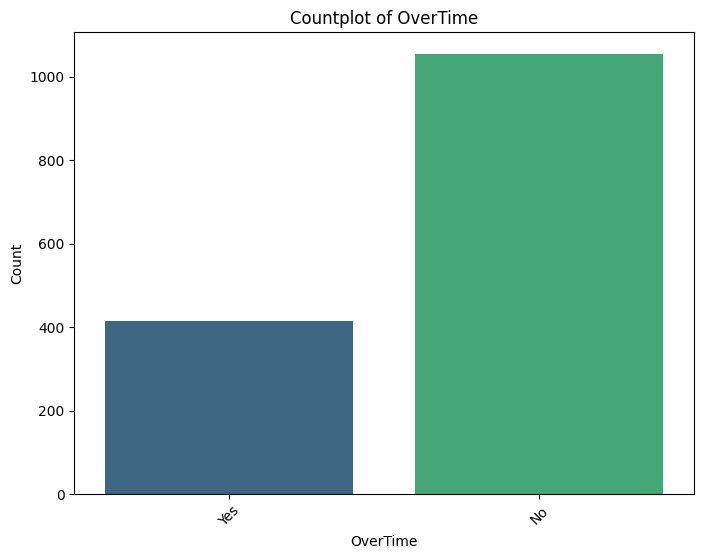

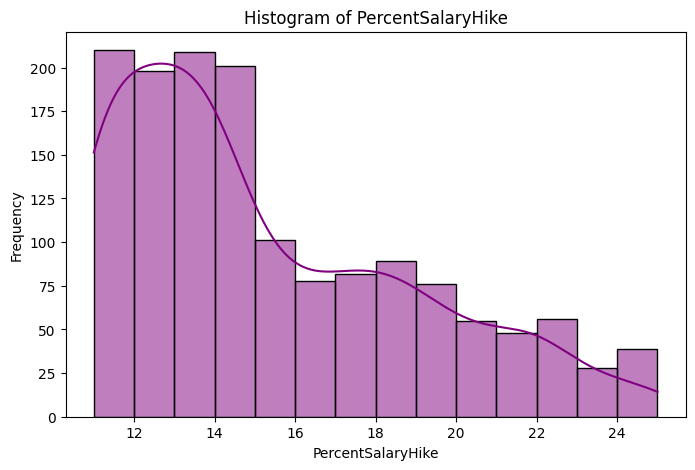

<Figure size 640x480 with 0 Axes>

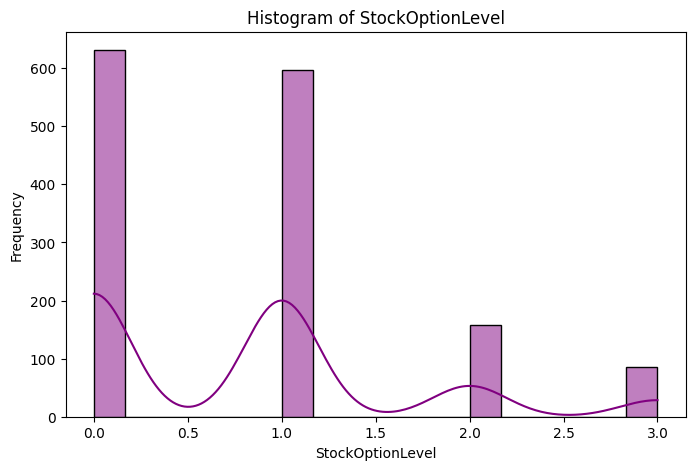

<Figure size 640x480 with 0 Axes>

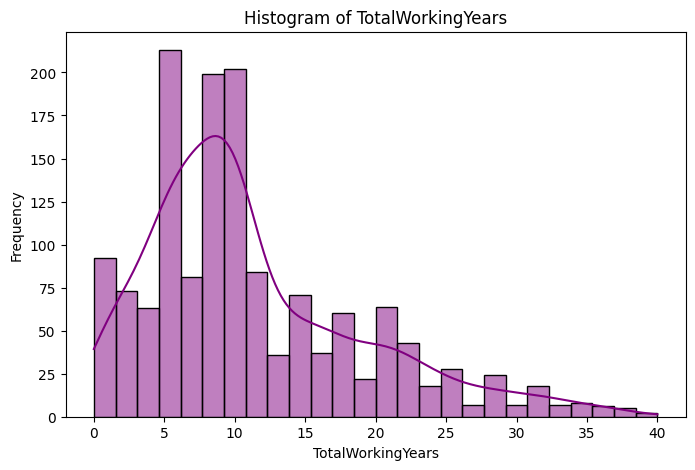

<Figure size 640x480 with 0 Axes>

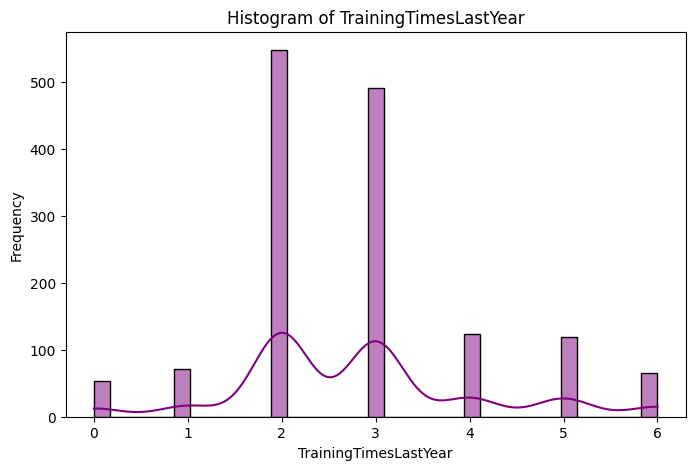

<Figure size 640x480 with 0 Axes>

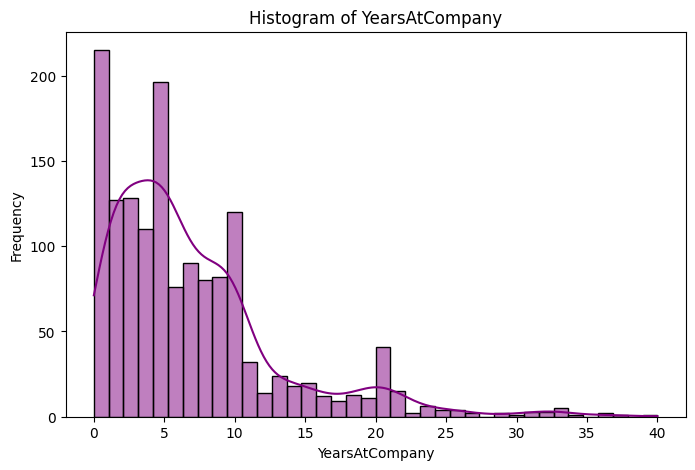

<Figure size 640x480 with 0 Axes>

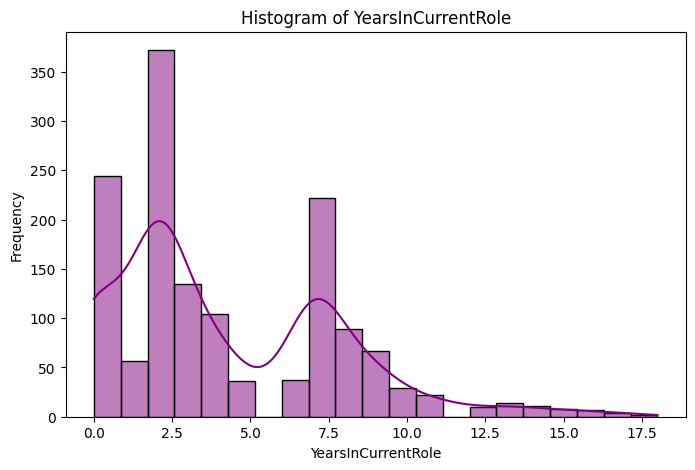

<Figure size 640x480 with 0 Axes>

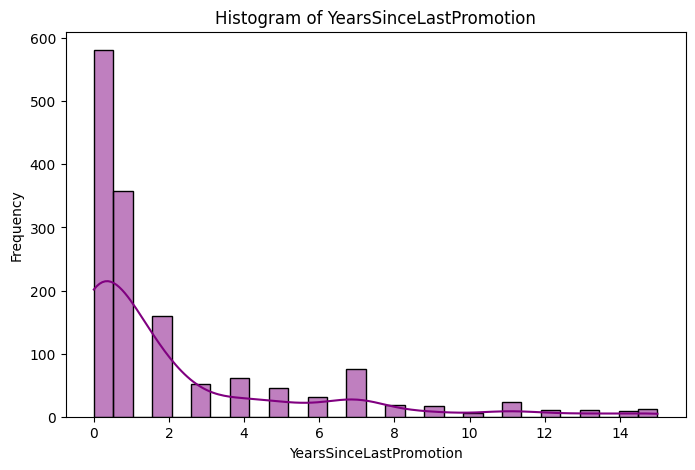

<Figure size 640x480 with 0 Axes>

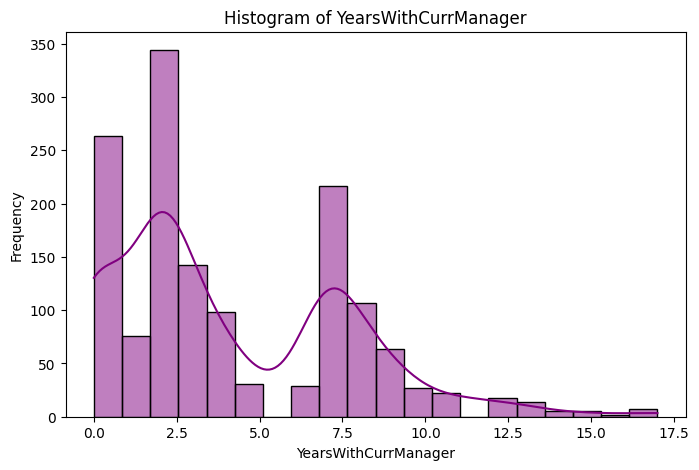

<Figure size 640x480 with 0 Axes>

In [22]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8,5))
        sns.histplot(df[column],kde=True,color='Purple')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        plt.tight_layout()
    # For categorical columns, plot a countplot
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(f'Countplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


In [24]:
## Univariate Analysis
!pip install sweetviz 

   ---------------------------------------- 15.1/15.1 MB 22.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import sweetviz as sv

# Analyze the dataset using Sweetviz
my_report = sv.analyze(df)

# Generate and display the HTML report
my_report.show_html()


Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from univariant analysis
* People between the age group 25-40 are the majority.
* 70% of the people travel raraely, 20% travel frequently rest do not travel.
* More than 70% of the employees belong to research and development.
* Almost 50% of the people are nearer to the office i.e the distance from their home is lesser than or equal to 10.
* More than 60% of the people have educational qualification of 4 and 5.
* Majority(40%) of the people are from life science field and 30% are from medical field.
* 60% of the people are almost satisfied with environment condition of the office with more than 3 ratings.
* Gender count: 60% male 40% female.
* 60% of the people have partial involvement in job and 20% have good involvement.
* More than 60% employees seem to be satisfied with their job.
* 50% of the people are married, 30% single and the rest are divorced.
* 60% of the people have less thanm 10k income.
* 40% of the people have worked for less than 1 company which implies they are freshers.
* 30% of the people have worked for more than 5 companies.
* 80% of the people have average work rating.
* 60% of the people have worked for the same company only for 5 years or lesser.
* 80% of the people own only 1 or 0 stock at the company.

# 4.2 Bivariate Analysis

In [27]:
## Create a new dataframe with categorical variables
data1=df[['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']]

In [28]:
data1

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


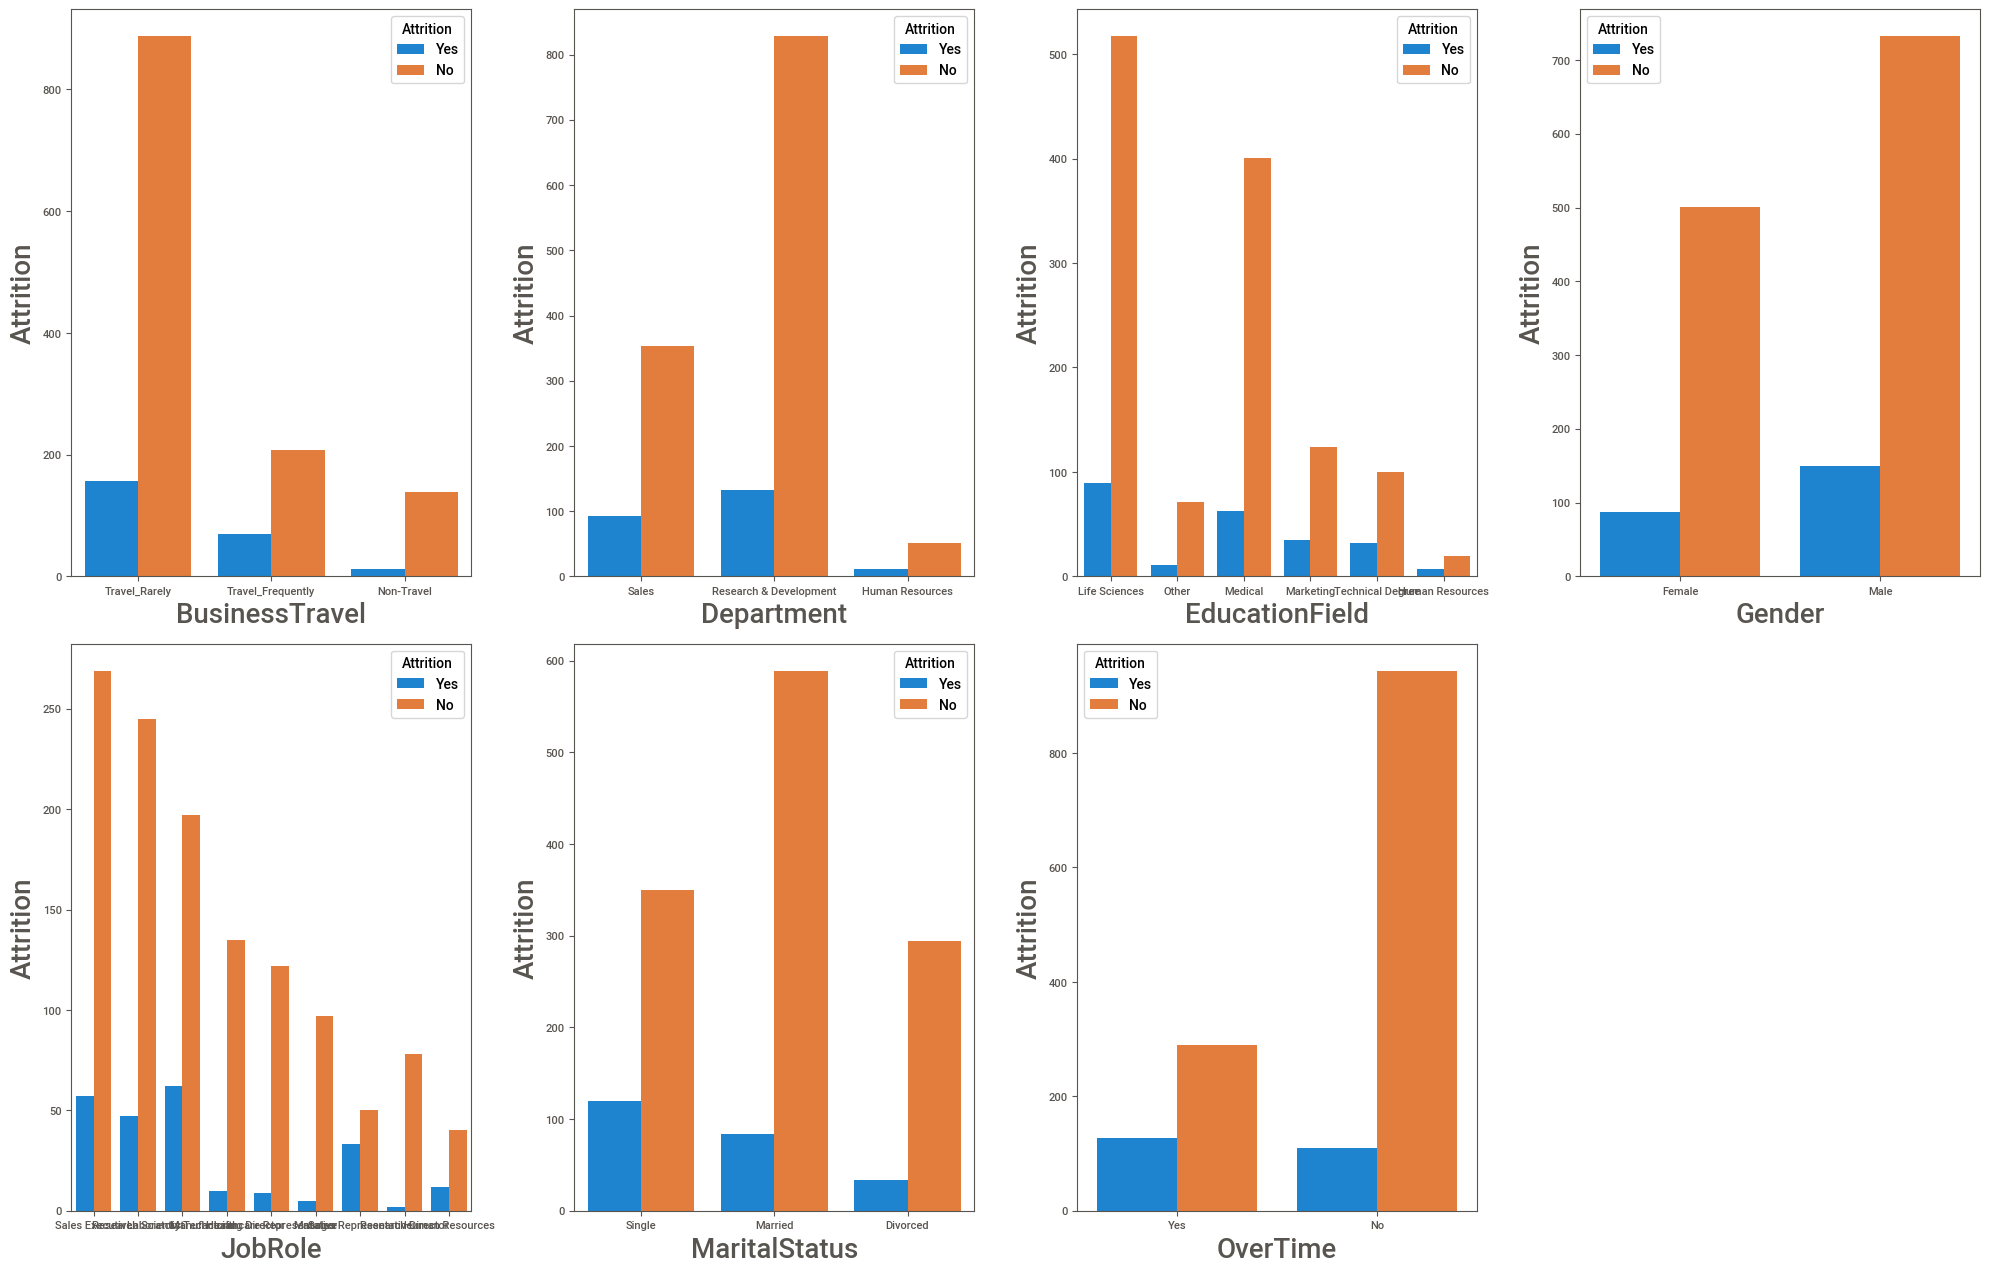

In [29]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data1:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data1[column]           #plotting count plot
                        ,hue=df.Attrition)
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()
plt.show()

## Insights from bivariant analysis
* More male employees are expected to quit their job.
* People who travel more are more expected to leave the job.
* People who do not do overtime do not leave the job.
* Singles are expected to quit the job.
* People from life science and mediacl field are more probably leaving their job.

In [32]:
data2=df[['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TrainingTimesLastYear']]#discrete columns

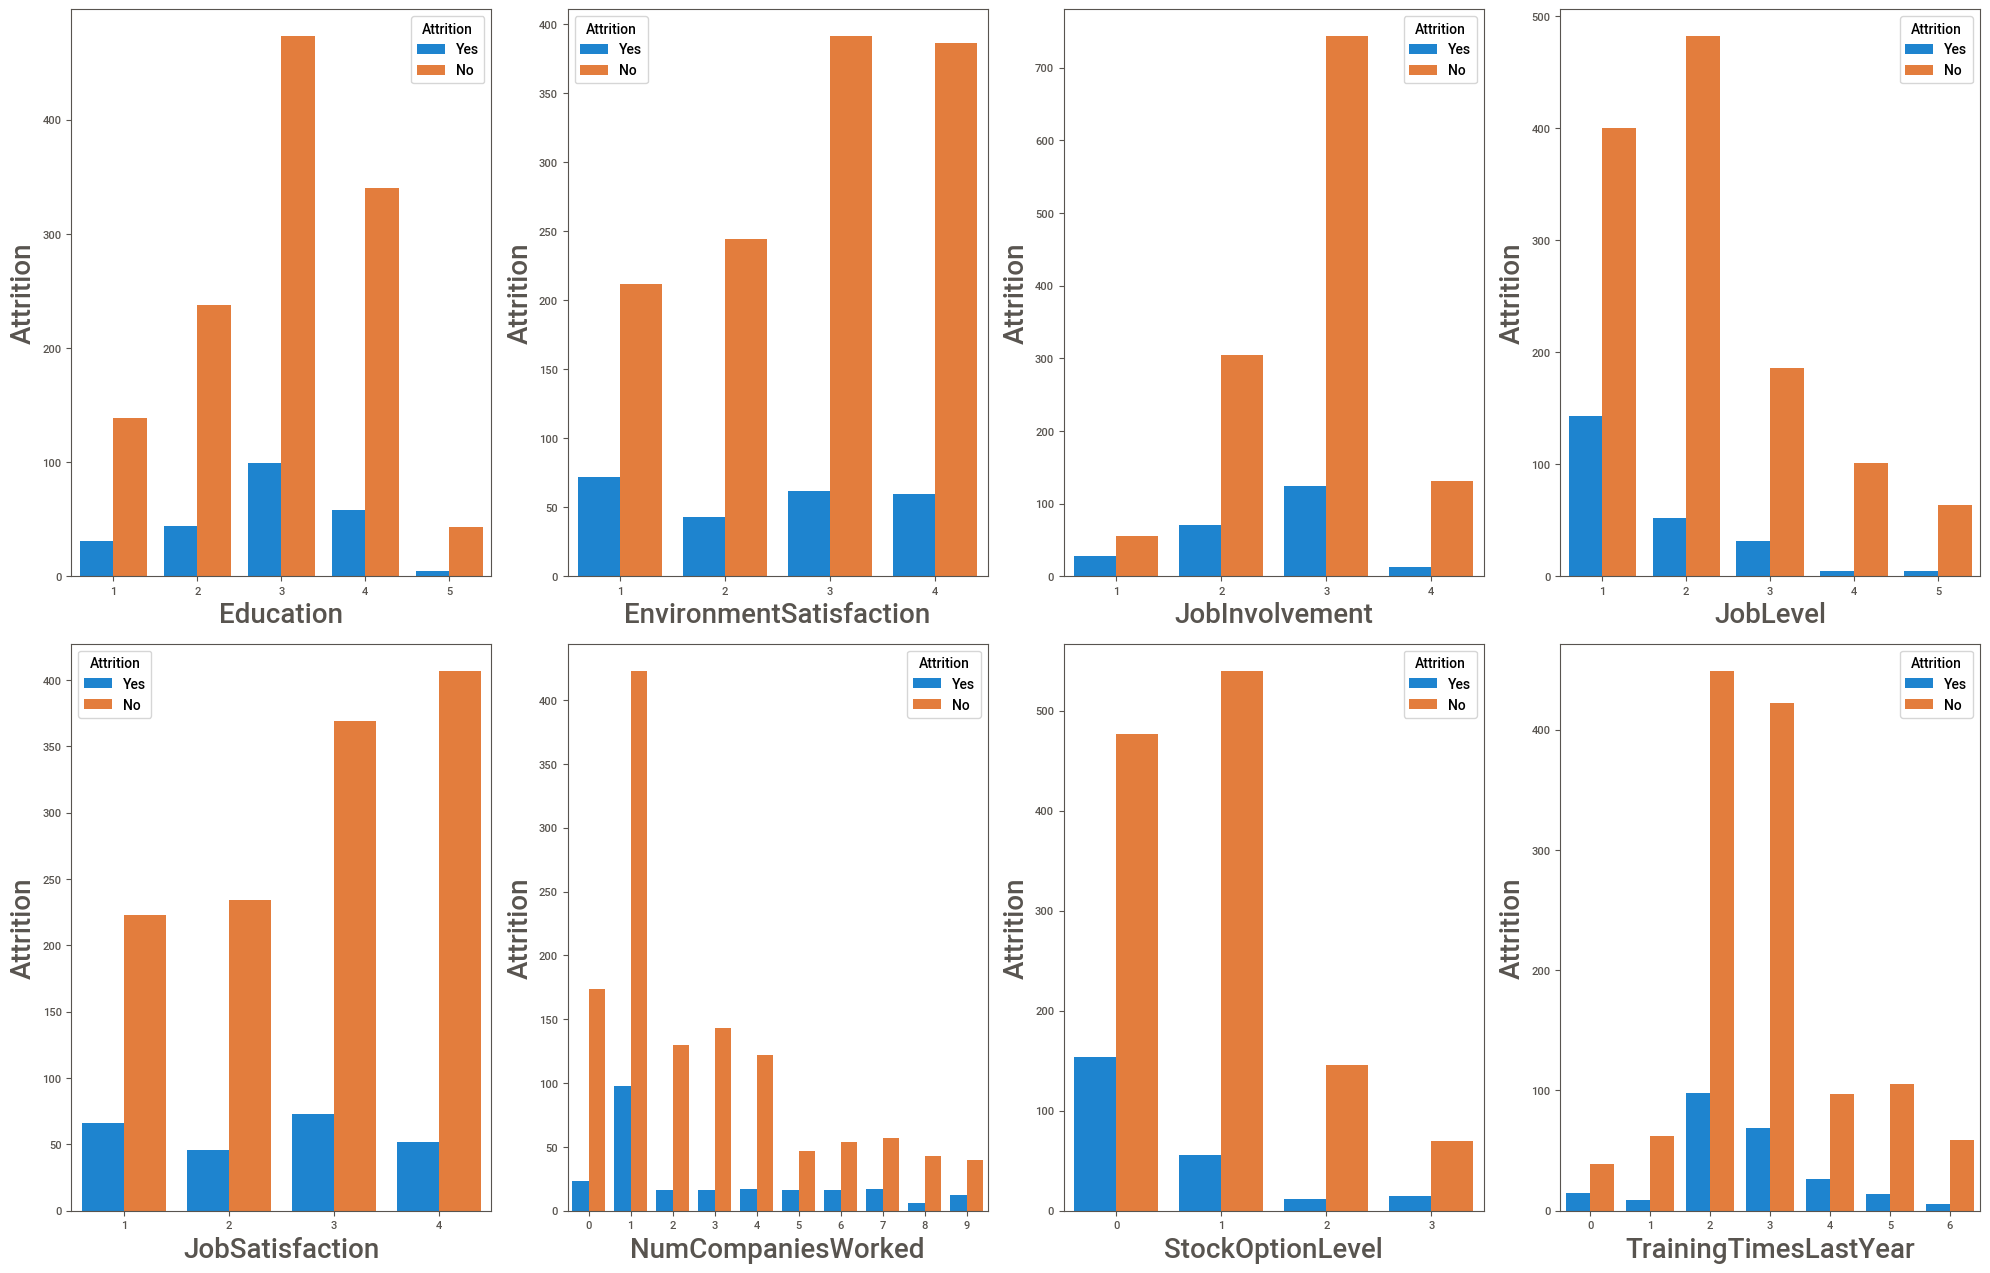

In [33]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column]
                        ,hue=df.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights:
* If anyone has an EnvironemntSatisfaction is 1 then they probably leave the job and have a score of 2.
* JobInvolvement is 3 has greater probability of leaving the job.
* Job level is less then their higher chances they can leave the job.
* NumCompaniesWorked is 1 then they want to shift company faster than others.
* if the performance rating is less then they will change the job.

## Bivariant analysis of continuous variables

In [36]:
data2=df[['Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']]#continuous variables/columns

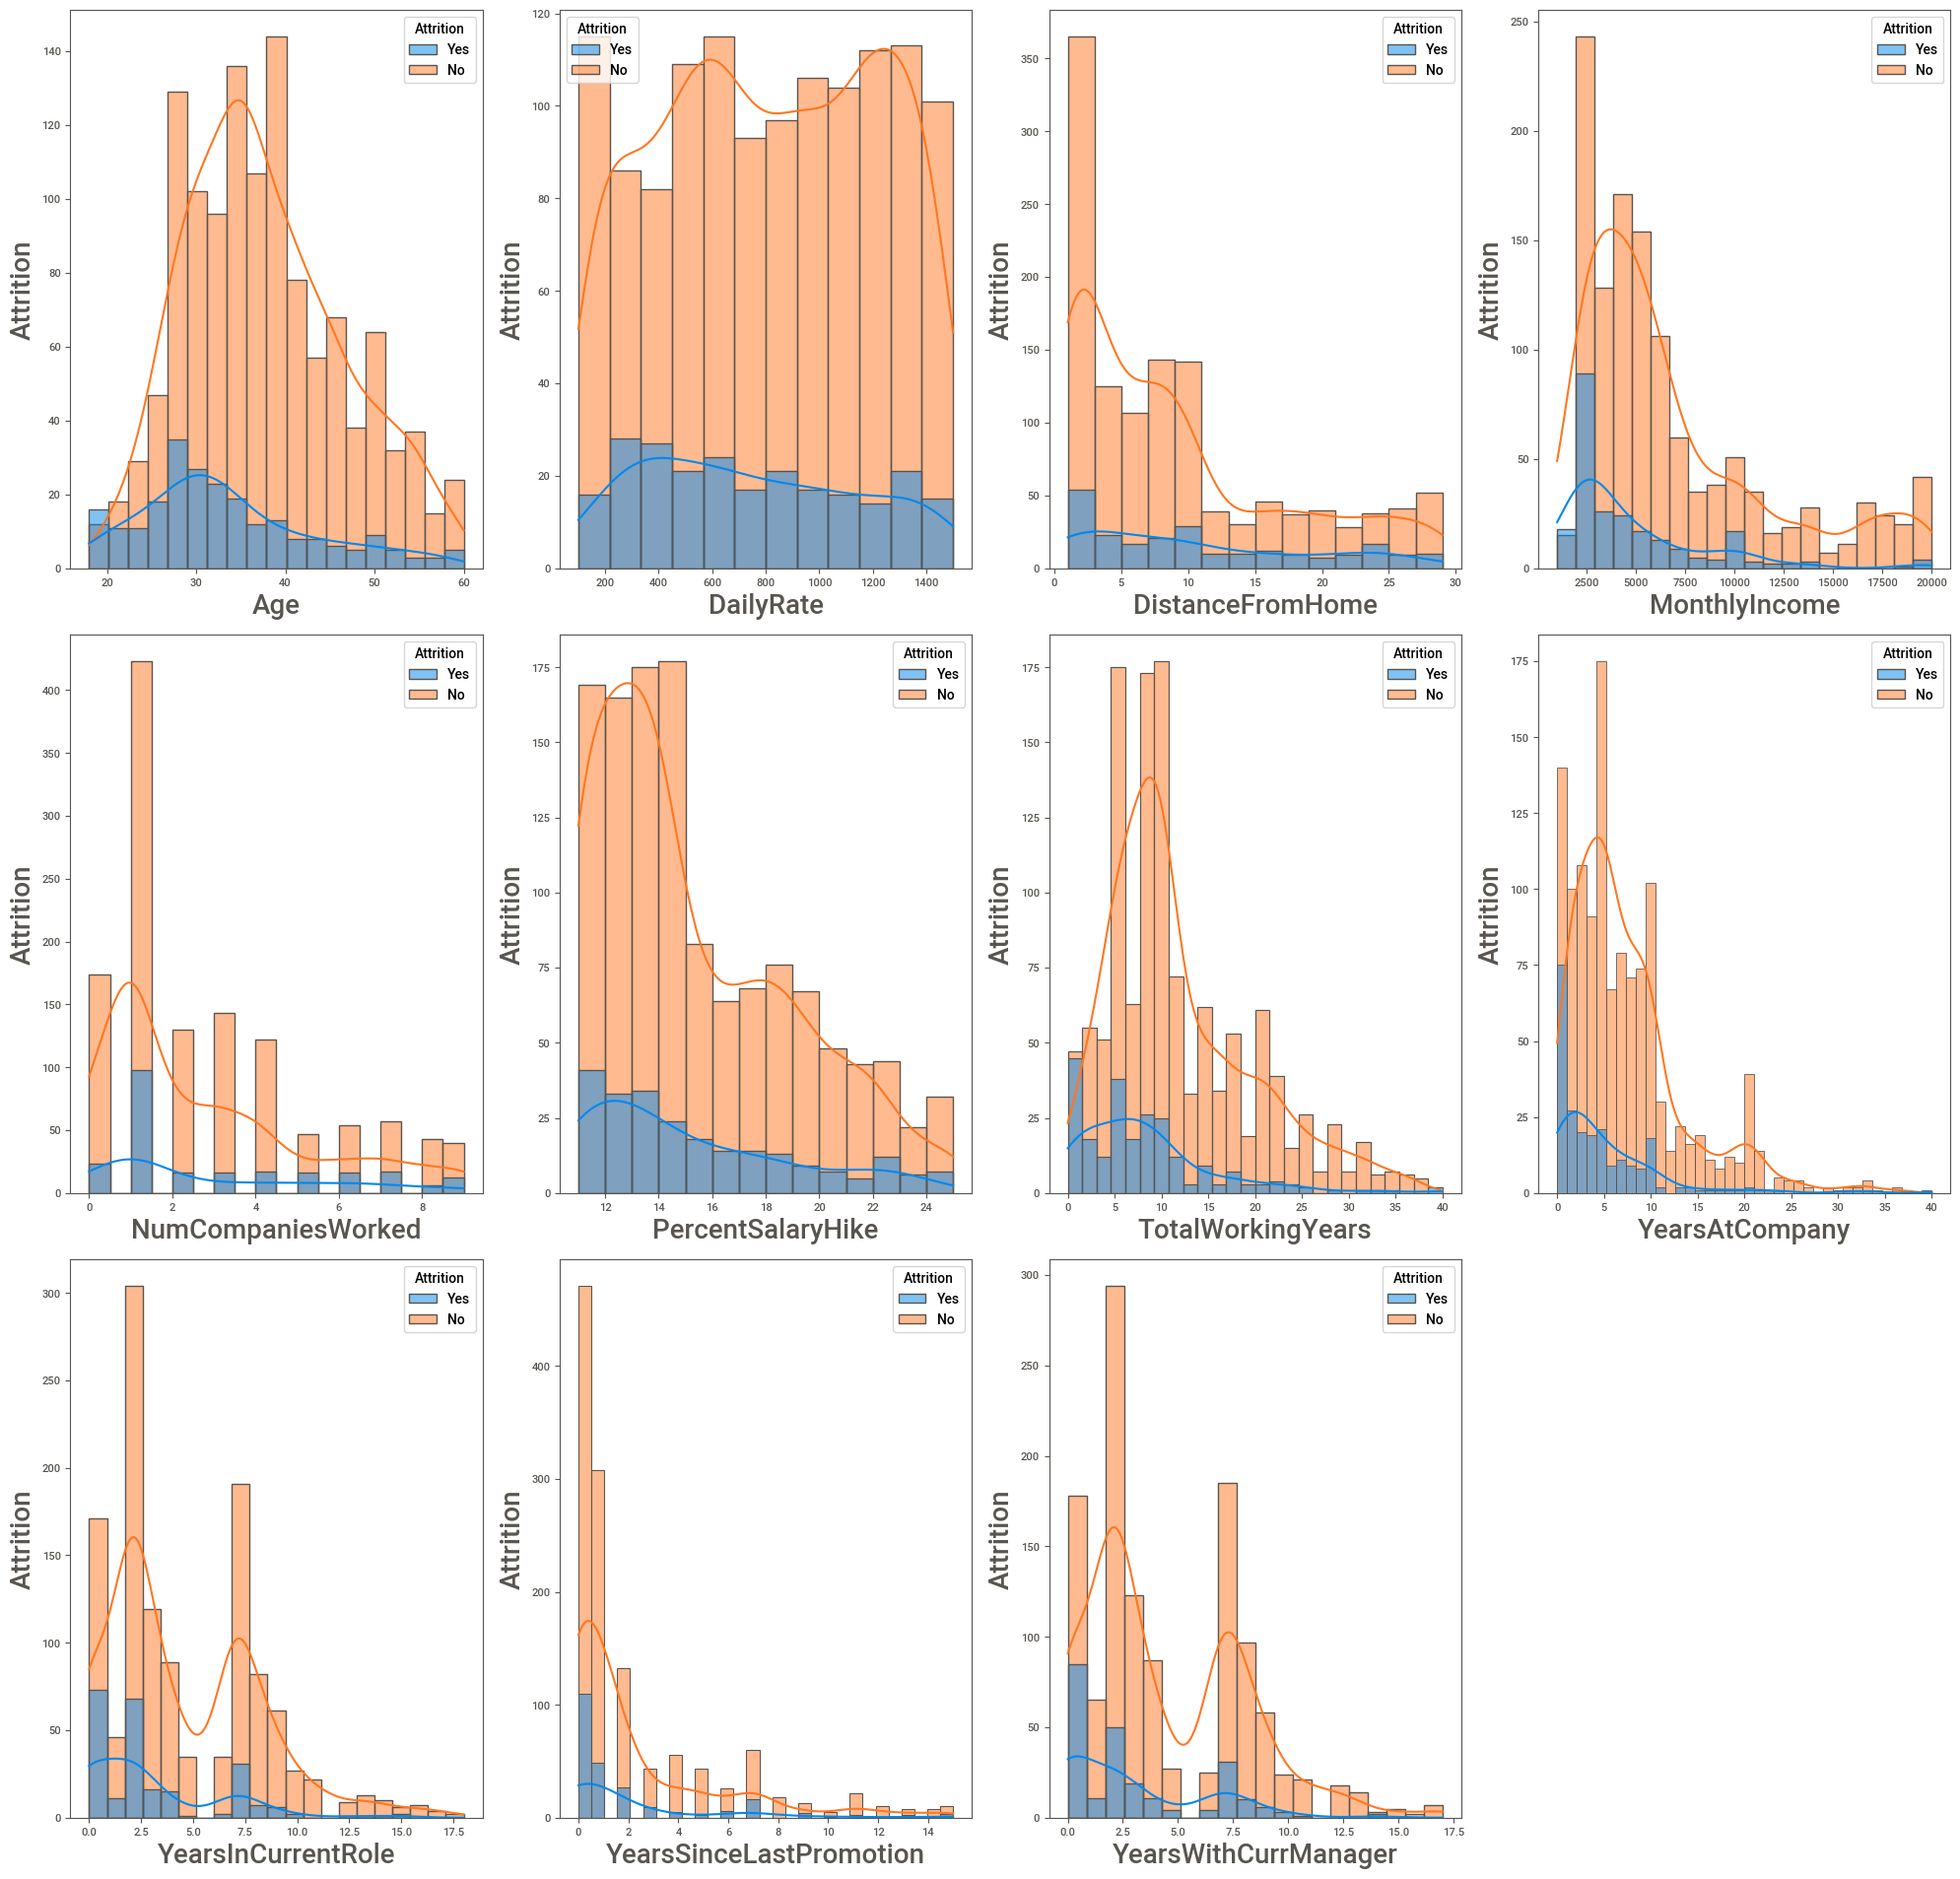

In [37]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data2:#acessing columns form data2 DataFrame
    if plotnumber<=16 :#checking whether counter is less than 16 or not
        ax = plt.subplot(4,4,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=data2[column]          # plotting hist plot and dropping null values,classification according to target
                        ,hue=df.Attrition,kde=True)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font
        plt.ylabel('Attrition',fontsize=20)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

# Final conclusions:
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : Attrition rate is almost equal